# Unitary Fermion Gas in BCC lattice

Compute g.s. energy of fermions in unitary limit coupling strength.

N=66 nucleons in one flavor with two spin states are placed in the BCC lattice 
in cubic boundary with length L 

In [1]:
from __future__ import print_function
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import *
from scipy import optimize 
import myutil

## Read results 

In [2]:
# read results of calculation 
out = myutil.read_fresco_res('02_BCCresults.dat')
# make results as numpy array
for key in out.keys():
    out[key]=np.array(out[key])

### Arrange the results 

(1) 'free' corresponds to free Fermion Gas energy of N=66 nucleons 
      
    free[n] = [L, exact, EH0, EM0, FG]
    where n     : L-index  such that L=L_val[n]
          exact : exact kinetic energy  
          EH0   : Hamiltonian energy 
          EM0   : Transfer energy 
          FG    : Thermodynamic expression 

(2) 'result1' corresponds to the code results 
    which use Gaussian wave function 
    
    result1[n][nLt] = [N,L, Ltinner, EH0, EH0_err, EM0, EM0_err, ntot, nthr]
    where n : L-index   such that L= L_val[n]
          nLt: Lt-index such that Lt=Lt_val[nLt]
          ntot : number of configurations per processor 
          nthr : number of processors used 

(3) 'result2' corresponds to the code results
     which use plane wave but with high momentum 

(4) 'result3' corresponds to the code results 
     which use lowest energy plane wave 

In [29]:
L_val=[5,6,7,8,9,10,11];
Lt_val=[100,200,300,400,500,600];

free={}
for n in range(7):
    free[n]={};
    free[n]['L']=np.array(out[0][n,0])
    free[n]['exact']=np.array(out[0][n,1])
    free[n]['EH0']=np.array(out[0][n,2])
    free[n]['EM0']=np.array(out[0][n,3])
    free[n]['FG']=np.array(out[0][n,4])
        
result1={}
for n in range(len([5,6,7,8,9])  ):
    result1[n]={}
    result1[n]['N']=out[1+n][:,0]
    result1[n]['L']=out[1+n][:,1]
    result1[n]['Lt']=out[1+n][:,2]
    result1[n]['EH0']=out[1+n][:,3:5]
    result1[n]['EM0']=out[1+n][:,5:7]
    result1[n]['Ncfg']=out[1+n][:,7:]

result2={}
for n in range(len([5,6,7,8,9,10,11])):
    result2[n]={}
    result2[n]['N']=out[6+n][:,0]
    result2[n]['L']=out[6+n][:,1]
    result2[n]['Lt']=out[6+n][:,2]
    result2[n]['EH0']=out[6+n][:,3:5]
    result2[n]['EM0']=out[6+n][:,5:7]
    result2[n]['Ncfg']=out[6+n][:,7:]
        
result3={}
for n in range(len([5,6,7,8,9,10,11])):
    result3[n]={}
    result3[n]['N']=out[13+n][:,0]
    result3[n]['L']=out[13+n][:,1]
    result3[n]['Lt']=out[13+n][:,2]
    result3[n]['EH0']=out[13+n][:,3:5]
    result3[n]['EM0']=out[13+n][:,5:7]
    result3[n]['Ncfg']=out[13+n][:,7:]    

## Compute ratio
Bertsch parameter is computed either by 
beta_finite = EM0(unitary)/EM0(free) 

or 

beta_fg = EM0(unitary)/E_FG(free) 

(1) 'beta_finite_1' :  numerator from EM0 of result1
                      denominator from EM0 of free
(2) 'beta_finite_2' :  numerator from EM0 of result2
                      denominator from EM0 of free
(3) 'beta_finite_3' :  numerator from EM0 of result3
                      denominator from EM0 of free

(4) 'beta_fg_1' : numerator from EM0 of result1
                  denominator from E_FG of free 
(5) 'beta_fg_2' : numerator from EM0 of result2
                  denominator from E_FG of free 
(6) 'beta_fg_3' : numerator from EM0 of result3
                  denominator from E_FG of free 

In [39]:
for n in range(len([5,6,7,8,9])  ):
    result1[n]['beta_fin']=result1[n]['EM0']/free[n]['EM0']
    result1[n]['beta_fg']=result1[n]['EM0']/free[n]['FG']
    
for n in range(len([5,6,7,8,9,10,11])):
    result2[n]['beta_fin']=result2[n]['EM0']/free[n]['EM0']
    result2[n]['beta_fg']=result2[n]['EM0']/free[n]['FG']

for n in range(len([5,6,7,8,9,10,11])):
    result3[n]['beta_fin']=result3[n]['EM0']/free[n]['EM0']
    result3[n]['beta_fg']=result3[n]['EM0']/free[n]['FG']

## ratio plot 

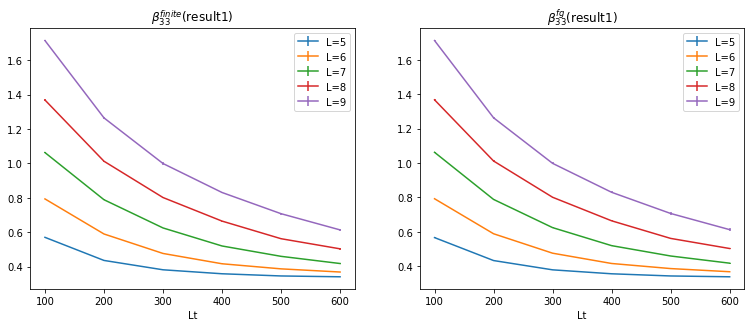

In [40]:
# Result 1
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
for n in result1 :
    plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,label = 'L=%i'%(result1[n]['L'][0]))
plt.title(r'$\beta^{finite}_{33}$(result1)');
plt.xlabel('Lt');
plt.legend()  ;

plt.subplot(122)
for n in result1 :
    plt.errorbar(result1[n]['Lt'], result1[n]['beta_fg'][:,0], yerr=result1[n]['beta_fg'][:,1]
                 ,label = 'L=%i'%(result1[n]['L'][0]))
plt.title(r'$\beta^{fg}_{33}$(result1)');
plt.xlabel('Lt');
plt.legend()  ;

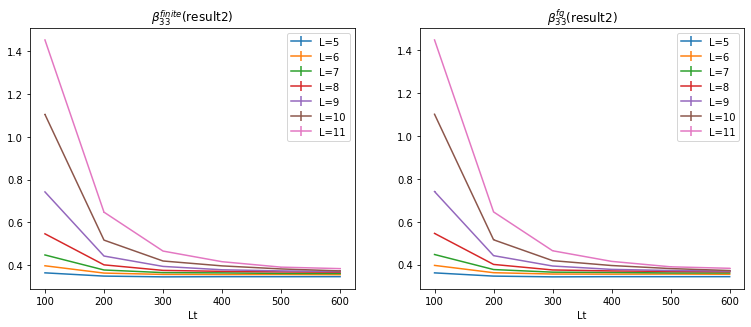

In [41]:
# Result 2
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
for n in result2 :
    plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
                 ,label = 'L=%i'%(result2[n]['L'][0]))
plt.title(r'$\beta^{finite}_{33}$(result2)');
plt.xlabel('Lt');
plt.legend()  ;

plt.subplot(122)
for n in result2 :
    plt.errorbar(result2[n]['Lt'], result2[n]['beta_fg'][:,0], yerr=result2[n]['beta_fg'][:,1]
                 ,label = 'L=%i'%(result2[n]['L'][0]))
plt.title(r'$\beta^{fg}_{33}$(result2)');
plt.xlabel('Lt');
plt.legend()  ;

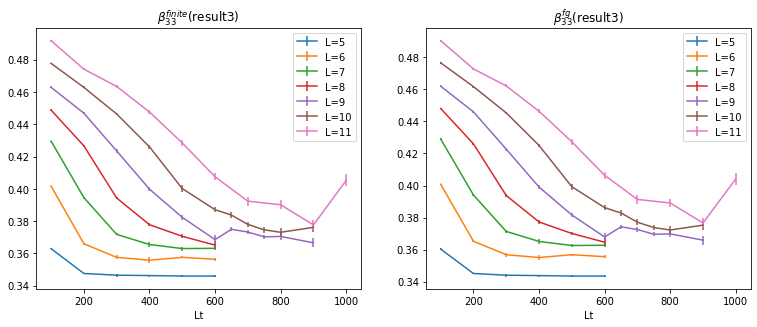

In [42]:
# Result 3
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
for n in result3 :
    plt.errorbar(result3[n]['Lt'], result3[n]['beta_fin'][:,0], yerr=result3[n]['beta_fin'][:,1]
                 ,label = 'L=%i'%(result3[n]['L'][0]))
plt.title(r'$\beta^{finite}_{33}$(result3)');
plt.xlabel('Lt');
plt.legend()  ;

plt.subplot(122)
for n in result3 :
    plt.errorbar(result3[n]['Lt'], result3[n]['beta_fg'][:,0], yerr=result3[n]['beta_fg'][:,1]
                 ,label = 'L=%i'%(result3[n]['L'][0]))
plt.title(r'$\beta^{fg}_{33}$(result3)');
plt.xlabel('Lt');
plt.legend()  ;

# Fit and extrapolation in Lt dependence

Fit Lt dependence with exponential decaying function
Obtain asymptotic limit Lt-> infinity 